# S07 T01: Tasca del test d'hipòtesis
## Descripció

Aprèn a realitzar test d'hipòtesis amb Python.
## Nivell 1
### - Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [119]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import pingouin as pg


Cargamos los datos y hacemos una pequeña inspeccion

In [120]:
df=pd.read_csv('diabetes.csv')
df = df.dropna(how='all')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [122]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [124]:
df.groupby('Outcome').size()


Outcome
0    500
1    268
dtype: int64

El numero de diabeticos y no diabeticos esta desequilibrado

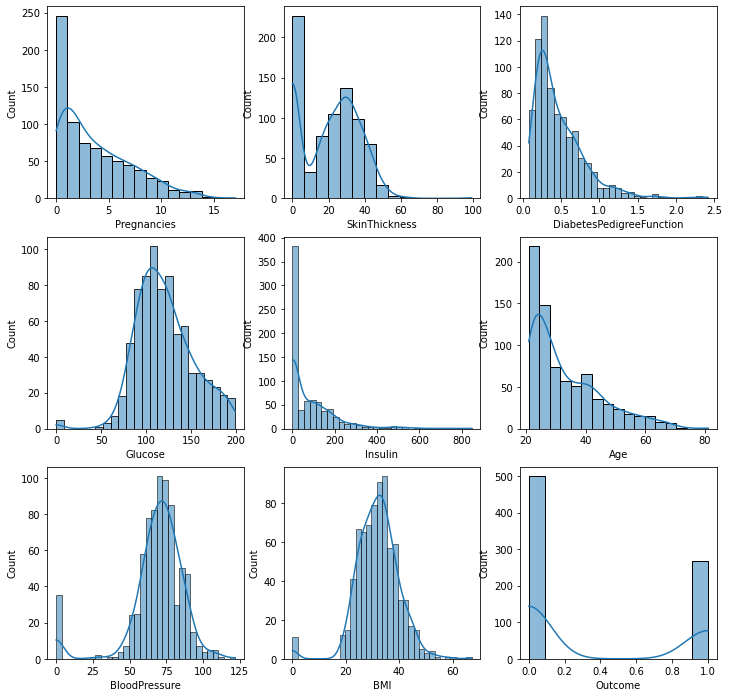

In [125]:

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
count=0
for column in df.columns.values:   
    sns.histplot(df[column], kde=True, ax=ax[count%3,int(count/3)])
    count=count+1


Vemos que hay valores extraños y muchos 0 extraños como en la presion saginia que es 0 o la glucosa. En el analisis eliminaremos estos valoers

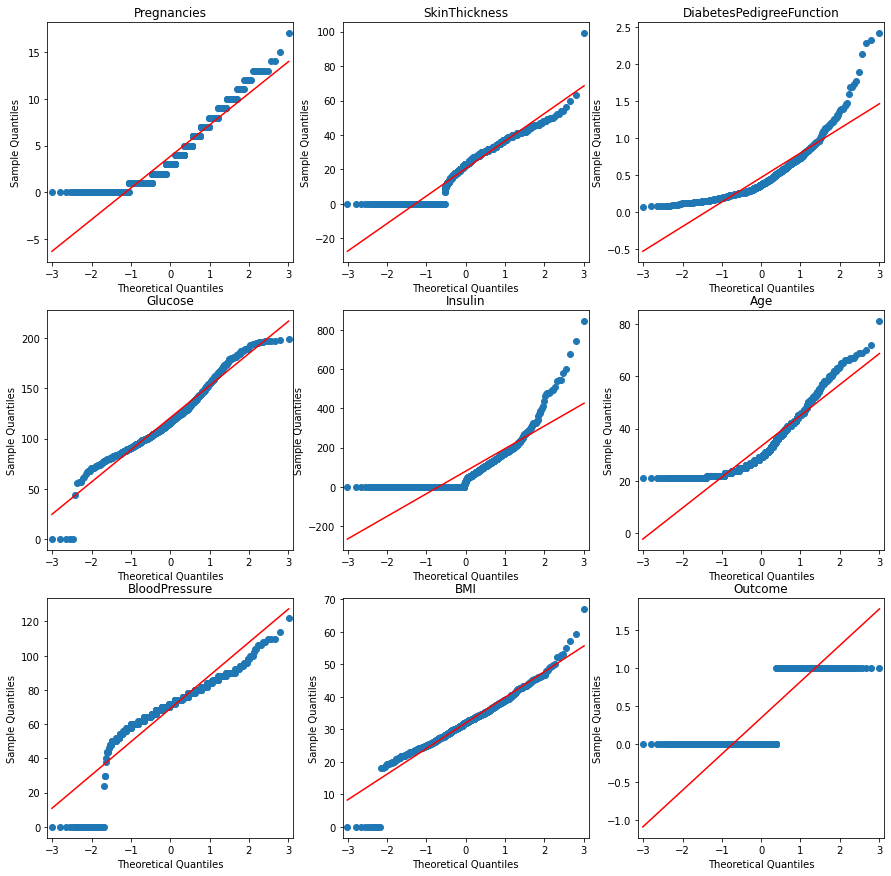

In [126]:
import numpy as np
import pylab
import scipy.stats as stats

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
count=0
for column in df.columns.values:   
    sm.qqplot(df[column],line='s',ax=ax[count%3,int(count/3)])
    ax[count%3,int(count/3)].title.set_text(column)
    count=count+1
    
 


Parece que la distribuciones se aleja de la normalidad sobretodo en los extremos, como la graficas de barras ya dejaba intuir

Verificamos con un boxplot

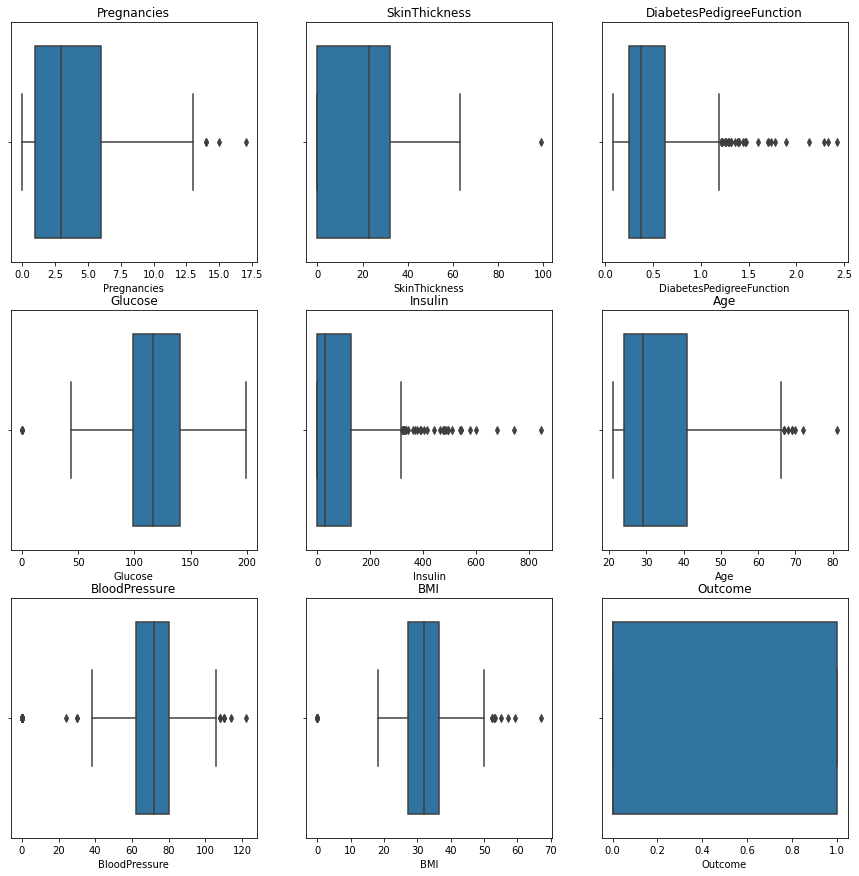

In [127]:

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
count=0
for column in df.columns.values:   
    sns.boxplot(x=df[column],ax=ax[count%3,int(count/3)])
    ax[count%3,int(count/3)].title.set_text(column)
    count=count+1



Vemos que hay muchos puntos fuera de rango limparemos los puntos anomalos

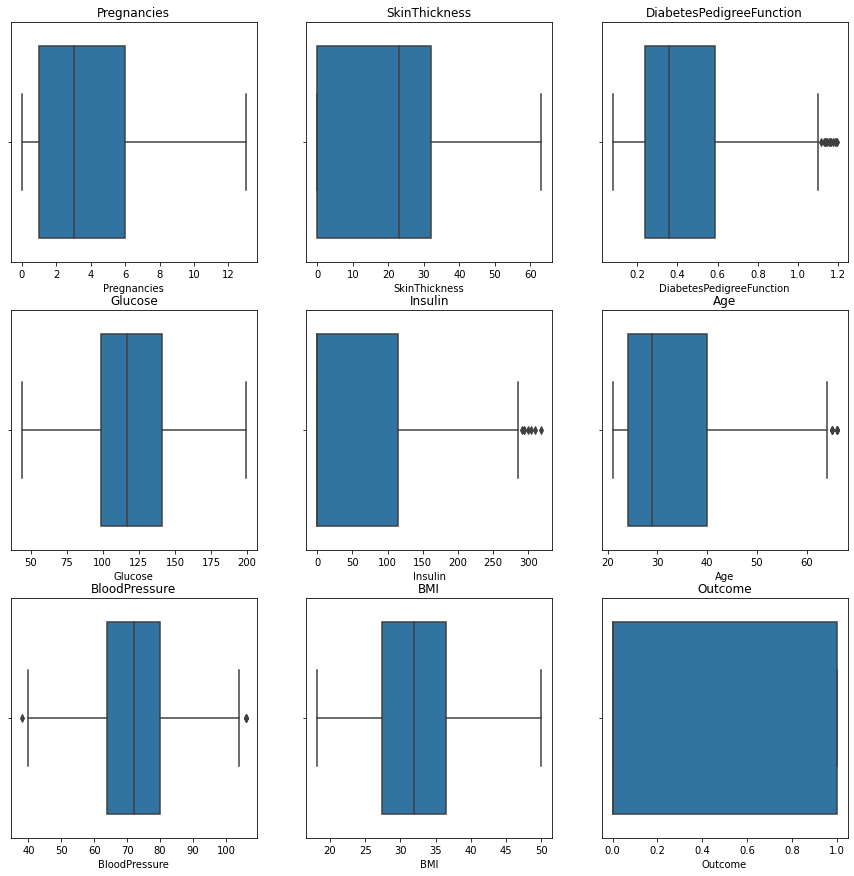

In [128]:
def ouliers_limits(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    q_range = q3 - q1
    upper_limit = q3 + 1.5 * q_range
    lower_limit = q1 - 1.5 * q_range
    return upper_limit, lower_limit


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
count=0
df_outliers=pd.DataFrame()
for column in df.columns.values:   
    upper, lower = ouliers_limits(df, column)
    df_outliers = df[(df[column] > lower) & (df[column] < upper)]
    sns.boxplot(x=df_outliers[column],ax=ax[count%3,int(count/3)])
    ax[count%3,int(count/3)].title.set_text(column)
    count=count+1





Como vemos en la representacion anterior los putos anomalos se han reducico

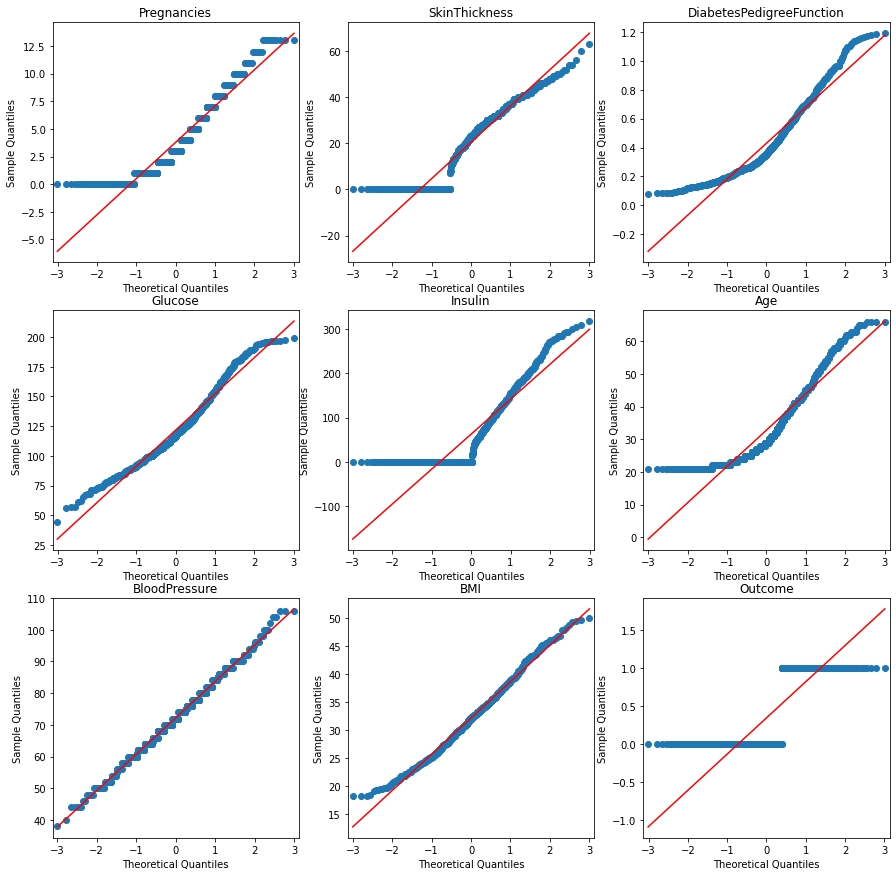

In [129]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
count=0
for column in df.columns.values:
    upper, lower = ouliers_limits(df, column)
    df_outliers = df[(df[column] > lower) & (df[column] < upper)]   
    sm.qqplot(df_outliers[column],line='s',ax=ax[count%3,int(count/3)])
    ax[count%3,int(count/3)].title.set_text(column)
    count=count+1

vemos que ls presion saguinia sigue una distribucion nomrmal al igual que el BMI

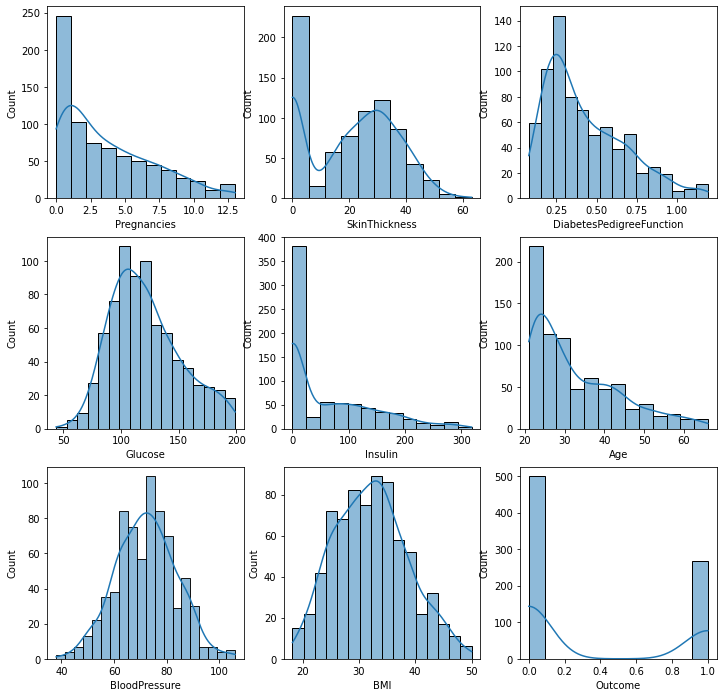

In [130]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
count=0
for column in df.columns.values:  
    upper, lower = ouliers_limits(df, column)
    df_outliers = df[(df[column] > lower) & (df[column] < upper)]    
    sns.histplot(df_outliers[column], kde=True, ax=ax[count%3,int(count/3)])
    count=count+1

La media no se encuentra centrada asi que habra que normalizar

Pero intentamos ver numericamente con el test de Shapiro el grado de normalida vamos ha hacer la hipotesis de que siuge la distrubucion normal o gausiana

Ho --> la columna sigue una distribucion normal
Ha --> la columna no siguie una distribucion normal

In [131]:
print("Hipotesis nula H0 el factor sigue una distribucion gausiana")
print("Hipotesis alternativa H1 el factor no sigue una distribucion gausiana")
alpha=0.05
df_copy = df.copy()
df_copy.drop(['Outcome'],axis=1,inplace=True)
for column in df_copy.columns.values:
    upper, lower = ouliers_limits(df, column)
    df_outliers = df[(df[column] > lower) & (df[column] < upper)]    
    stat, p = stats.shapiro(df_outliers[column])
    print('%s stats=%.5f,p=%.5f'%(column,stat,p))
    if p > alpha:
           print('no se rechaza la hipótesis nula H0')
    else:
           print('se rechaza la hipótesis nula H0')

Hipotesis nula H0 el factor sigue una distribucion gausiana
Hipotesis alternativa H1 el factor no sigue una distribucion gausiana
Pregnancies stats=0.90583,p=0.00000
se rechaza la hipótesis nula H0
Glucose stats=0.96964,p=0.00000
se rechaza la hipótesis nula H0
BloodPressure stats=0.99610,p=0.06959
no se rechaza la hipótesis nula H0
SkinThickness stats=0.90476,p=0.00000
se rechaza la hipótesis nula H0
Insulin stats=0.78994,p=0.00000
se rechaza la hipótesis nula H0
BMI stats=0.99006,p=0.00006
se rechaza la hipótesis nula H0
DiabetesPedigreeFunction stats=0.91778,p=0.00000
se rechaza la hipótesis nula H0
Age stats=0.88072,p=0.00000
se rechaza la hipótesis nula H0


Haciendo el test de shapiro podemos verificar que la presion saguinia sigue una distribucion normal

In [132]:
alpha=0.05
df_copy = df.copy()
df_copy.drop(['Outcome'],axis=1,inplace=True)
for column in df_copy.columns.values:
    upper, lower = ouliers_limits(df, column)
    df_outliers = df_copy[(df[column] > lower) & (df[column] < upper)]    
    stat,p = stats.normaltest(df_outliers[column])
    print('%s stats=%.5f,p=%.5f'%(column,stat,p))
    if p > alpha:
           print('no se rechaza la hipótesis nula H0)\n')
    else:
           print('se rechaza la hipótesis nula H0)')

Pregnancies stats=69.05998,p=0.00000
se rechaza la hipótesis nula H0)
Glucose stats=35.36914,p=0.00000
se rechaza la hipótesis nula H0)
BloodPressure stats=0.50354,p=0.77742
no se rechaza la hipótesis nula H0)

SkinThickness stats=458.05662,p=0.00000
se rechaza la hipótesis nula H0)
Insulin stats=103.15796,p=0.00000
se rechaza la hipótesis nula H0)
BMI stats=15.20721,p=0.00050
se rechaza la hipótesis nula H0)
DiabetesPedigreeFunction stats=78.90831,p=0.00000
se rechaza la hipótesis nula H0)
Age stats=96.66255,p=0.00000
se rechaza la hipótesis nula H0)


With the k test we found the same results 
El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

    Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

    Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos. 

In [133]:
upper, lower = ouliers_limits(df, column)
df_outliers = df[(df[column] > lower) & (df[column] < upper)]   
BloodPressure_diabetes = df_outliers[(df_outliers.Outcome == 1) & (df_outliers.BloodPressure > 0)]['BloodPressure']
high_BloodPressure_diabetes = BloodPressure_diabetes > 120
low_BloodPressure_diabetes = BloodPressure_diabetes < 90
BloodPressure_nodiabetes = df_outliers[(df_outliers.Outcome == 0) & (df_outliers.BloodPressure > 0)]['BloodPressure']
BloodPressure =df_outliers[df_outliers.BloodPressure>0]['BloodPressure']

The BloodPressure related with BloodPressure_diabetes

In [134]:
alpha=0.05
statistic, pvalue = stats.ttest_1samp(a = BloodPressure_nodiabetes,popmean = BloodPressure.mean()) 
if pvalue == alpha/2:
    print("the Blood Pressure of no diabetics are equal to the standard population")
else:
    print("the Blood Pressure of no diabetics are different to the standard population")

the Blood Pressure of no diabetics are different to the standard population


In [135]:
stats.ttest_1samp(a = BloodPressure_diabetes,popmean = BloodPressure.mean()) 
if pvalue > alpha:
    print("the Blood Pressure of  diabetics are equal to the standard population")
else:
    print("the Blood Pressure of  diabetics are different to the standard population")

the Blood Pressure of  diabetics are different to the standard population


## Nivell 2

## - Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

miramos la correlacion entre las variables

In [136]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [137]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='BloodPressure', group='Outcome')

,W,pval,equal_var
levene,1.712003,0.191118,True


In [138]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
diabetis = df.loc[df.Outcome == 1, 'BloodPressure']
nodiabetis = df.loc[df.Outcome == 0, 'BloodPressure']

stats.ttest_ind(diabetis, nodiabetis)


#pg.ttest(x=nodiabetis, y=diabetis, alternative='two-sided', correction=False)

Ttest_indResult(statistic=1.8047023017353887, pvalue=0.07151390009776082)

In [139]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
diabetis = df.loc[df.Outcome == 1, 'Glucose']
nodiabetis = df.loc[df.Outcome == 0, 'Glucose']

stats.ttest_ind(diabetis, nodiabetis)


#pg.ttest(x=nodiabetis, y=diabetis, alternative='two-sided', correction=False)

Ttest_indResult(statistic=14.600060005973894, pvalue=8.935431645289913e-43)

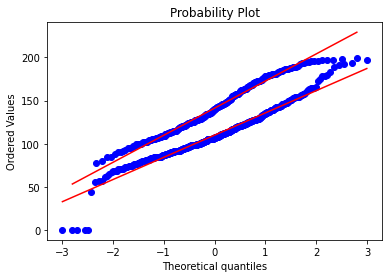

In [140]:
stats.probplot(df[df.Outcome == 1]['Glucose'],dist="norm",plot=pylab)
stats.probplot(df[df.Outcome == 0]['Glucose'],dist="norm",plot=pylab)
pylab.show() 


![image](HypothesisTestExcelGuide.jpg)
No sigue la distribucion normal por lo que aplicamos many


stat=750.500, p=0.000
el nivel alto de glucosa afecta a la diabetes


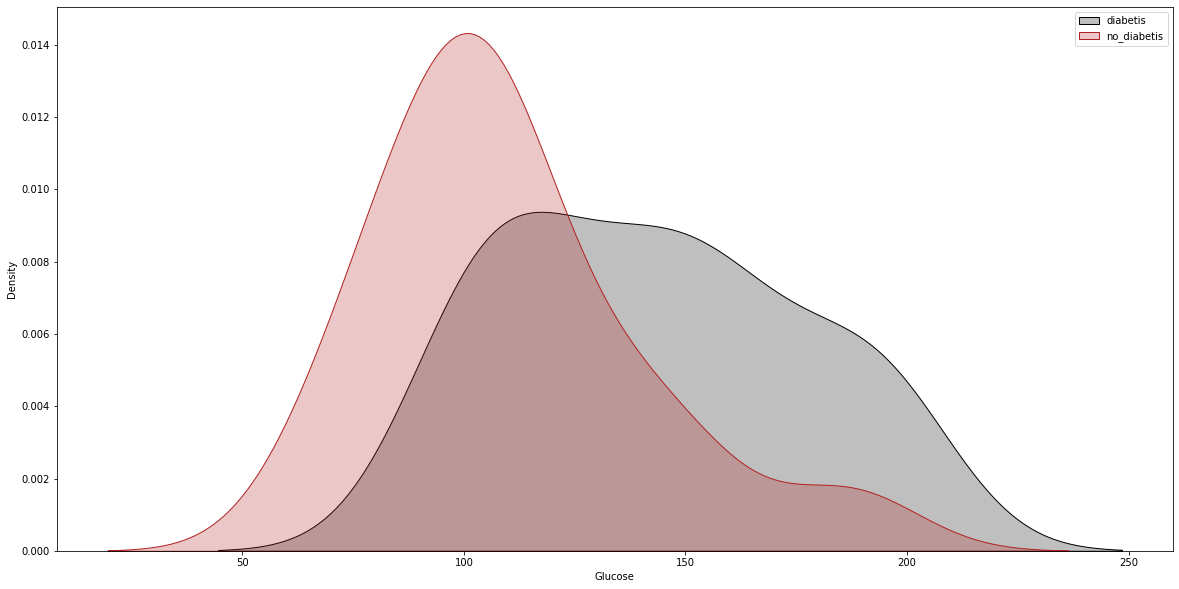

In [145]:
glucose_diabetes=(df_outliers[df_outliers.Outcome == 1]['Glucose']).sample(samplingSize).sort_values()
glucose_no_diabetes=(df_outliers[df_outliers.Outcome == 0]['Glucose']).sample(samplingSize).sort_values()

plt.figure(figsize=(20, 10))
sns.kdeplot(glucose_diabetes, label="diabetis", shade = True, color = '#000000')
sns.kdeplot(glucose_no_diabetes, label="no_diabetis", shade = True, color = '#B22222')
plt.legend();


# Example of the Wilcoxon Signed-Rank Test
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(glucose_diabetes, glucose_no_diabetes)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La glucosa alta no tiene relacion con la diabetes')
else:
    print('el nivel alto de glucosa afecta a la diabetes')

## Nivell 3
## - Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Para 3 variables aplicaremos ANOVA para el analisis

In [142]:

samplingSize=31
junior=(df_outliers[(df_outliers.Age < 25) & (df_outliers.Outcome == 1)]).sample(samplingSize)
adult=(df_outliers[(df_outliers.Age >= 25) & (df_outliers.Age < 50) & (df_outliers.Outcome == 1)]).sample(samplingSize)
senior=(df_outliers[(df_outliers.Age >= 50) & (df_outliers.Outcome == 1)]).sample(samplingSize)


stat=334.990, p=0.000
la media de edad influye en el riesgo de diabetes


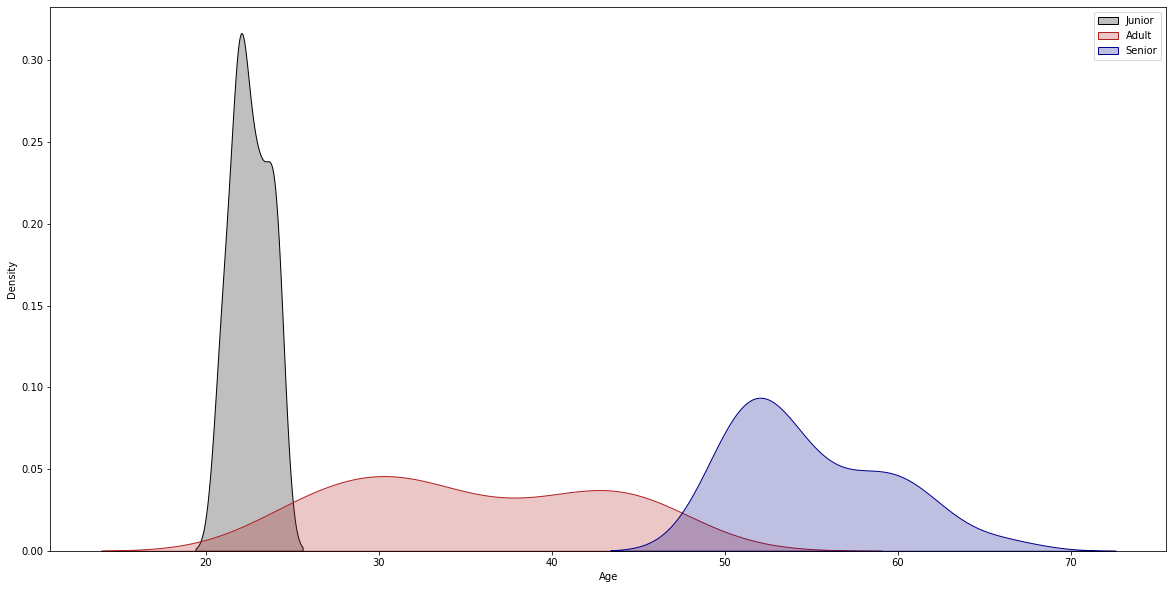

In [143]:
from scipy.stats import f_oneway

plt.figure(figsize=(20, 10))
sns.kdeplot(junior.Age, label="Junior", shade = True, color = '#000000')
sns.kdeplot(adult.Age, label="Adult", shade = True, color = '#B22222')
sns.kdeplot(senior.Age, label="Senior", shade = True, color = '#00008B')
plt.legend();

stat, p = f_oneway(junior.Age, adult.Age, senior.Age)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('la edad no influye en el riesgo de la diabetes')
else:
    print('la media de edad influye en el riesgo de diabetes')

## Referencias
http://deepmachinelearningai.com/useful-statistical-hypothesis-tests-in-python/